# Comment

In [44]:
# plot color
# https://matplotlib.org/stable/gallery/color/named_colors.html

# cv
# https://coding-potato.tistory.com/15
# https://jimmy-ai.tistory.com/178

# feature importance
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

# set_axis
# https://stackoverflow.com/questions/39132181/dataframe-set-index-from-list

# plt, ax
# https://m.blog.naver.com/allieverwanted/222146678032

# GPU

In [82]:
# Graphic Driver
# https://www.nvidia.com/Download/index.aspx?lang=en-us

# CUDA Toolkit
# https://developer.nvidia.com/cuda-toolkit

# cuDNN
# https://developer.nvidia.com/cudnn

In [94]:
import tensorflow as tf

# TensorFlow가 GPU를 인식하는지 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


# Import and Load

In [45]:
from typing import Any
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action="ignore")
plt.rc('font', family="Malgun Gothic")

In [147]:
preprocess_file = "../data/preprocessing.csv"
df_pp = pd.read_csv(preprocess_file)

df_test_1 = pd.read_csv("../원본 데이터/test240227_ver315.csv")

In [47]:
df_pp['track_E']

0              Mount Wario
1          Dragon Driftway
2              Mount Wario
3            3DS DK Jungle
4        DS Wario Stardium
              ...         
615       DS Mario Circuit
616    Wii Grumble Volcano
617     GC Yoshi's Circuit
618    DS Walluigi Pinball
619          Mario Circuit
Name: track_E, Length: 620, dtype: object

# AI formula Preprocessing Function

In [135]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [157]:
drop_columns = [
    'index', 'date', 'round', 'win_odds', 'lose_odds', 'track_E_encoded', 'prefix_rank',
    'odds_result', 'significant', 'odds_result_SU', 'odds_result_UD',
]
remain_columns = [
    'game_count', 'game_goal', 'cur_game_count', 'cc', 'part_people', 'track_E',
    'rank', 'RESULT'
]
df_pp = pd.read_csv(preprocess_file)
df_pp = df_pp.drop(drop_columns, axis=1)
X = df_pp
X, y_rank, y_result = X.drop(['rank', 'RESULT'], axis=1), X['rank'], X['RESULT'].astype(bool)

In [136]:
def modeling(
    X: pd.DataFrame,
    y_rank: pd.Series=y_rank,
    y_result: pd.Series=y_result
) -> BaseEstimator:
    
    clf = GradientBoostingClassifier()    
    x_train, x_test, y_train, y_test = train_test_split(
        X, y_result, test_size=0.2, random_state=42
    )
    clf.fit(x_train, y_train)
    
    reg = GradientBoostingRegressor()
    x_train, x_test, y_train, y_test = train_test_split(
        X, y_rank, test_size=0.2, random_state=42
    )
    reg.fit(x_train, y_train)
    
    return clf, reg

# Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
# Load course data
df_course = pd.read_csv("../data/course.csv")

# Generate label encoder
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(df_course['track_name_E'])
origin_classes = label_encoder.classes_

# Generate course and encoded data dictionary
cte = dict(zip(origin_classes, encoded))    # course_to_encoding
etc = dict(zip(encoded, origin_classes))    # encoding_to_course

# One Hot Encoding

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [51]:
# Extract 'track_E' column
df_track_E = df_pp[['track_E']]

# Ohe Hot Encoding
ohe = OneHotEncoder()
df_encoded = ohe.fit_transform(df_track_E).toarray()

# To transform ohe df, avgerage is 0 and variance is 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# PCA

In [52]:
from sklearn.decomposition import PCA

In [53]:
# dimension = 3
# pca = PCA(n_components=dimension)
# pca_result = pca.fit_transform(scaled_data)
# pca_result

In [54]:
pca = PCA()
pca.fit_transform(scaled_data)

array([[-1.42521836e-12, -1.73041687e-01,  1.49932445e-12, ...,
        -6.85713449e-14, -1.87813945e-12,  8.43117592e-15],
       [-1.80096744e-12, -2.18087804e-01, -2.89608858e-12, ...,
         4.17736571e-15, -1.67127789e-12, -2.43301204e-14],
       [-1.42582634e-12, -1.73041687e-01,  1.49916977e-12, ...,
        -6.90320573e-14, -1.87778514e-12, -5.10737963e-15],
       ...,
       [-2.06788261e-12, -2.18087804e-01, -1.05201420e-12, ...,
        -1.22233604e-14, -1.64332792e-12,  1.97056297e-15],
       [-3.57878664e-12, -4.57410498e-01,  8.51089745e-12, ...,
        -5.67504775e-15, -1.28103383e-12,  2.44760107e-16],
       [-9.04600211e-12, -1.01964118e+00, -4.54660777e+00, ...,
         6.72577912e-14, -1.27536372e-12, -9.22380074e-16]])

# Scree Plot

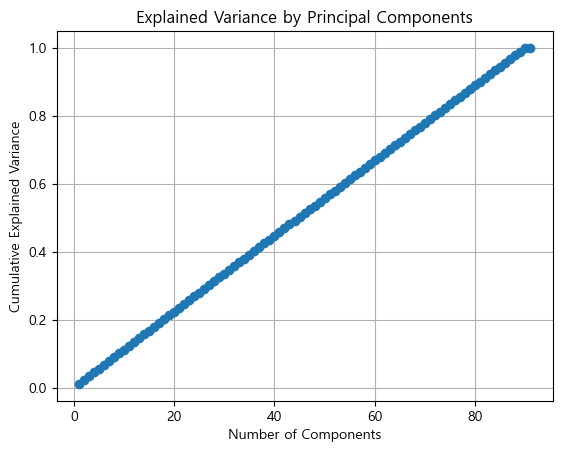

In [55]:
# 설명된 분산 비율 시각화
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [56]:
# 90%와 95% 설명 분산 비율을 달성하는 주성분 수
for ratio in range(5, 100 + 1, 5):
    n_components_ratio = next(i for i, total in enumerate(cumulative_explained_variance) if total >= 0.01 * ratio) + 1
    print(f'Number of components explaining {ratio}% variance: {n_components_ratio}')

Number of components explaining 5% variance: 5
Number of components explaining 10% variance: 9
Number of components explaining 15% variance: 14
Number of components explaining 20% variance: 18
Number of components explaining 25% variance: 23
Number of components explaining 30% variance: 27
Number of components explaining 35% variance: 32
Number of components explaining 40% variance: 36
Number of components explaining 45% variance: 41
Number of components explaining 50% variance: 45
Number of components explaining 55% variance: 50
Number of components explaining 60% variance: 54
Number of components explaining 65% variance: 59
Number of components explaining 70% variance: 63
Number of components explaining 75% variance: 68
Number of components explaining 80% variance: 72
Number of components explaining 85% variance: 77
Number of components explaining 90% variance: 81
Number of components explaining 95% variance: 86
Number of components explaining 100% variance: 90


# Sparse Matrix Dimension Reduction

In [57]:
dimensions = 3
sparse_matrix = df_encoded
original_data = df_track_E

# Truncated SVD (Latent Semantic Analysis)

In [58]:
from sklearn.decomposition import TruncatedSVD

In [59]:
svd = TruncatedSVD(n_components=dimensions)
reduced_data = svd.fit_transform(sparse_matrix)

### Scree Plot

In [60]:
svd = TruncatedSVD(n_components=sparse_matrix.shape[1] - 1)
svd.fit(sparse_matrix)

TruncatedSVD(n_components=90)

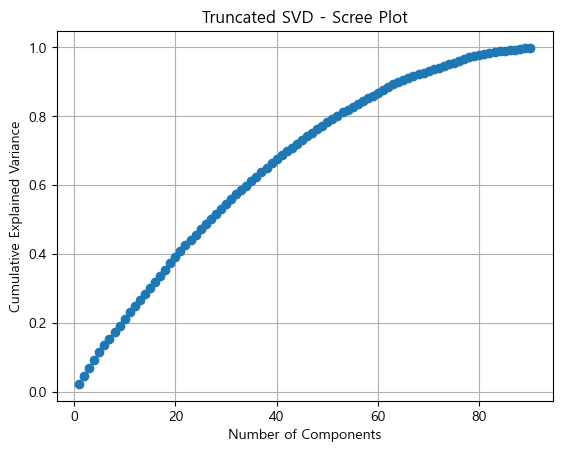

In [61]:
explained_variance = svd.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance, marker='o'
)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Truncated SVD - Scree Plot')
plt.grid(True)
plt.show()

# Non-Negative Matrix Factorization (NMF)

In [62]:
from sklearn.decomposition import NMF

In [63]:
nmf = NMF(n_components=dimensions)
reduced_data = nmf.fit_transform(sparse_matrix)

### Reconstruction Error

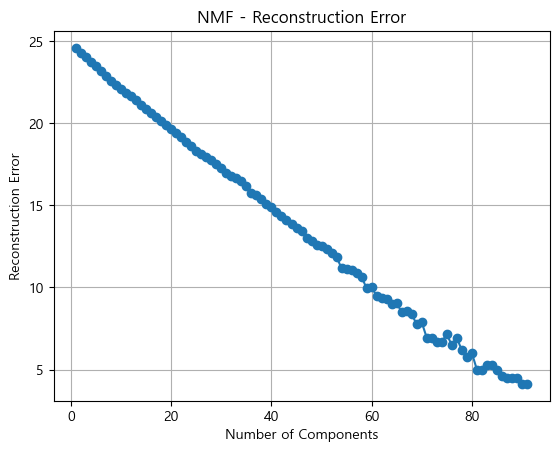

In [64]:
# 재구성 오차 저장 리스트
reconstruction_errors = []

# 여러 차원 수에 대한 NMF 실행
for n in range(1, sparse_matrix.shape[1] + 1):
    nmf = NMF(n_components=n, init='random', random_state=0)
    W = nmf.fit_transform(sparse_matrix)
    H = nmf.components_
    reconstruction = W @ H
    error = np.linalg.norm(sparse_matrix - reconstruction, 'fro')
    reconstruction_errors.append(error)

# 재구성 오차 플롯
plt.plot(range(1, sparse_matrix.shape[1] + 1), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('NMF - Reconstruction Error')
plt.grid(True)
plt.show()

# Autoencoder

In [65]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [66]:
input_dim = sparse_matrix.shape[1]    # 입력 차원 설정
encoding_dim = dimensions    # 차원 축소 후의 차원

# 인코더 정의
input_layer = Input(shape=(input_dim, ))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# 디코더 정의
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder 모델
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 인코더 모델
encoder = Model(inputs=input_layer, outputs=encoded)

# 컴파일 및 학습
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
autoencoder.fit(sparse_matrix, sparse_matrix,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 0s 98ms/step - loss: 0.2502 - val_loss: 0.2497
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2496 - val_loss: 0.2491
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 0.2490 - val_loss: 0.2486
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2485 - val_loss: 0.2480
Epoch 5/50
2/2 [==============================] - 0s 25ms/step - loss: 0.2479 - val_loss: 0.2475
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2473 - val_loss: 0.2469
Epoch 7/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2468 - val_loss: 0.2464
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 0.2462 - val_loss: 0.2458
Epoch 9/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2457 - val_loss: 0.2453
Epoch 10/50
2/2 [==============================] - 0s 54ms/step - loss: 0.2451 - val_loss: 0.2447
Epoch 11/50
2/2 [============

In [67]:
reduced_data = encoder.predict(sparse_matrix)

20/20 [==============================] - 0s 842us/step


### Reconstruction Error

In [68]:
# 차원 수별 재구성 오차 저장 리스트
reconstruction_errors = []

# 여러 차원 수에 대한 Autoencoder 실행
for encoding_dim in range(1, sparse_matrix.shape[1] + 1):
    # Autoencoder 모델 정의
    input_layer = Input(shape=(sparse_matrix.shape[1],))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(sparse_matrix.shape[1], activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    
    # 모델 컴파일 및 학습
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    autoencoder.fit(sparse_matrix, sparse_matrix, epochs=10, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)
    
    # 재구성 오차 계산
    reconstructed = autoencoder.predict(sparse_matrix)
    error = np.mean(np.square(sparse_matrix - reconstructed))
    reconstruction_errors.append(error)

20/20 [==============================] - 0s 895us/step


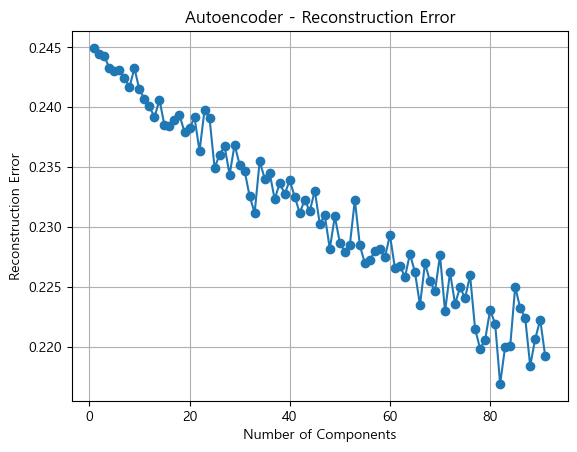

In [69]:
# 재구성 오차 플롯
plt.plot(range(1, sparse_matrix.shape[1] + 1), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Autoencoder - Reconstruction Error')
plt.grid(True)
plt.show()

# Feature Hashing (Hashing Trick)

In [70]:
from sklearn.feature_extraction.text import FeatureHasher

In [71]:
hasher = FeatureHasher(n_features=dimensions, input_type='dict')
hashed_data = hasher.transform(original_data.to_dict(orient='records'))

In [72]:
hashed_data.toarray()

array([[-1.,  0.,  0.],
       [ 0.,  0., -1.],
       [-1.,  0.,  0.],
       ...,
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  1.,  0.]])

# Frequency Encoding

In [90]:
frequency_encoding = df_track_E['track_E'].value_counts()
encoded = df_track_E['track_E'].map(frequency_encoding)
pd.DataFrame(encoded)

,track_E
0,10
1,11
2,10
3,7
4,9
...,...
615,8
616,4
617,11
618,13


In [91]:
# 빈도(frequency)를 기준으로 인코딩 했을 때의 문제
# 1. 데이터가 추가적으로 발생하면(마리오카트 게임을 한 판 했을 때) 빈도는 바로 달라진다.
#    따라서 해당 빈도로 학습한 것에 대한 의미가 없어진다.
# 2. 빈도가 달라질 때마다 주기적으로 재학습 시켜야 한다.

# Hash Encoding

In [110]:
import hashlib


def hash_label_encoding(value: str, num_buckets=100) -> int:
    return int(hashlib.sha256(value.encode('utf-8')).hexdigest(), 16) % num_buckets

In [170]:
encoded = pd.DataFrame(track_E['track_E'].apply(hash_label_encoding))
X['track_E'] = encoded

In [167]:
drop_columns = list(set(df_test_1.columns.tolist()) - set(remain_columns))
df_test = df_test_1.drop(drop_columns, axis=1)
test_x, test_rank, test_result = (
    df_test.drop(['rank', 'RESULT'], axis=1), df_test['rank'], df_test['RESULT'].astype(bool)
)
test_x['track_E'] = test_x['track_E'].apply(hash_label_encoding)

In [175]:
clf, reg = modeling(X)

clf_pred = clf.predict_proba(test_x)
reg_pred = reg.predict(test_x)

In [187]:
# clf 예측 결과 확인하기
for p, r in zip(clf_pred, test_result):
    print(f" 성공 {round(p[1]*100)}% 실패 {round(p[0]*100)}%", end=" / ")
    print(f"예측값: {'True' if p[1]>p[0] else 'False'}, 실제값: {r}")

 성공 15% 실패 85% / 예측값: False, 실제값: False
 성공 46% 실패 54% / 예측값: False, 실제값: False
 성공 32% 실패 68% / 예측값: False, 실제값: False
 성공 16% 실패 84% / 예측값: False, 실제값: False
 성공 16% 실패 84% / 예측값: False, 실제값: False
 성공 26% 실패 74% / 예측값: False, 실제값: False
 성공 20% 실패 80% / 예측값: False, 실제값: False
 성공 16% 실패 84% / 예측값: False, 실제값: False
 성공 18% 실패 82% / 예측값: False, 실제값: False
 성공 15% 실패 85% / 예측값: False, 실제값: False
 성공 22% 실패 78% / 예측값: False, 실제값: False
 성공 20% 실패 80% / 예측값: False, 실제값: False
 성공 22% 실패 78% / 예측값: False, 실제값: False
 성공 26% 실패 74% / 예측값: False, 실제값: False
 성공 18% 실패 82% / 예측값: False, 실제값: False
 성공 33% 실패 67% / 예측값: False, 실제값: False
 성공 37% 실패 63% / 예측값: False, 실제값: False
 성공 10% 실패 90% / 예측값: False, 실제값: False
 성공 19% 실패 81% / 예측값: False, 실제값: False
 성공 37% 실패 63% / 예측값: False, 실제값: False
 성공 33% 실패 67% / 예측값: False, 실제값: False
 성공 26% 실패 74% / 예측값: False, 실제값: False
 성공 12% 실패 88% / 예측값: False, 실제값: False
 성공 18% 실패 82% / 예측값: False, 실제값: False
 성공 24% 실패 76% / 예측값: False, 실제값: False


In [179]:
# reg 예측 결과 확인하기
for p, r in zip(reg_pred, test_rank):
    print(f"예측값: {round(p)}, 실제값: {r}")

예측값: 7, 실제값: 11
예측값: 6, 실제값: 12
예측값: 5, 실제값: 10
예측값: 6, 실제값: 10
예측값: 7, 실제값: 2
예측값: 7, 실제값: 12
예측값: 7, 실제값: 10
예측값: 7, 실제값: 7
예측값: 6, 실제값: 11
예측값: 7, 실제값: 5
예측값: 8, 실제값: 10
예측값: 6, 실제값: 3
예측값: 7, 실제값: 7
예측값: 7, 실제값: 11
예측값: 6, 실제값: 8
예측값: 7, 실제값: 8
예측값: 5, 실제값: 6
예측값: 8, 실제값: 8
예측값: 8, 실제값: 2
예측값: 5, 실제값: 4
예측값: 6, 실제값: 10
예측값: 7, 실제값: 4
예측값: 6, 실제값: 3
예측값: 7, 실제값: 12
예측값: 6, 실제값: 4
예측값: 7, 실제값: 6
예측값: 5, 실제값: 8
